## 탐색적 데이터 분석 (EDA, Exploratory, Data Analysis)
- 데이터의 주요 특성을 파악하고 패턴을 찾고 이상값을 식별하며 가설을 세우기 ㅎ위한 이련의 방법론,
- 데이터 분석 초기 단계에 수행되며, 데이터를 시각화 하고 통계적으로 요약 합니다.

  1.데이타의 분포와 패턴 파악aa
  2. 이상값 탐지
  3. 변수간 관계확인
  4. 데이터의 통계적 요약


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

train = pd.read_csv('./datasets/titanic/train.csv',index_col='PassengerId')
train.shape # 데이터의 행열 수 출력

(891, 11)

In [3]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- servived : 생존1, 사망0
- plcass: 1,2,3 등석
- sibsp : siblings/ spouses (형제, 배우자)
- parch : parent/childern (부모, 자식)
- cabin :선실번호
-= embarked: 선착장

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### 척도
#### 질적척도
- 명목 척도 : 관찰하는 대상의 속성에 따라 그 값을 숫자로 나타냄, 분류할 목적으로 숫자를 사용하고 숫자 자체가 가지고 있는 의미는 없음(남자1,여자2)
- 서열 척도 : 관찰하는 대상의 특성을 츨정해서 그 값을 순위로 나타내는 것( 성적 1등.. 2등..) 높낫이는 알 수 없지만 어느정도 차이인지 알 수 없음

#### 양적척도
- 등간척도 : 관찰 대상의 속성을 상대적 크기로 나타냄 순위를 부여할 뿐만 아니라 어느정도 큰지 숫자간의 의미가 있음(온도, 날짜) 가산이 가능함.
- 비율 척도 : 절대적 기준이 있는 영점이 존재하고 모든 사칙 연산이 가능 (판매량, 점수, 키,...)


In [7]:
# 결측치 체그
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
gender_mean = train.groupby('Sex')['Age'].mean()
gender_mean

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

- 결측치는 평균값, 중앙값, 선행값, 후행값, 그룹 평균값 등 다양한 값으로 채울 수잇음.
  

In [11]:
# 남자 평균, 여자 쳥규느 아이로 채우기.
train.loc[(train['Sex']=='female')&(train['Age'].isnull()),'Age']= int(gender_mean[0])
train.loc[(train['Sex']=='male')&(train['Age'].isnull()),'Age']= int(gender_mean[1])
train.isnull().sum()

C:\Users\202-2\AppData\Local\Temp\ipykernel_34508\241681004.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train.loc[(train['Sex']=='female')&(train['Age'].isnull()),'Age']= int(gender_mean[0])
C:\Users\202-2\AppData\Local\Temp\ipykernel_34508\241681004.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train.loc[(train['Sex']=='male')&(train['Age'].isnull()),'Age']= int(gender_mean[1])


Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
train.Cabin.value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [15]:
train['Cabin'] = train['Cabin'].fillna('N')
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [17]:
train = train.dropna() #결츨값 포함된 행 제거.
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [19]:
###생존자, 사망자 인원수 출력
train['Survived'].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [21]:
# 라벨 컬럼 생성
train['Survived_label']= train['Survived'].replace(0,'Dead').replace(1,'Survived')
train['Survived_label'].value_counts()

Survived_label
Dead        549
Survived    340
Name: count, dtype: int64

<Axes: xlabel='Survived_label'>

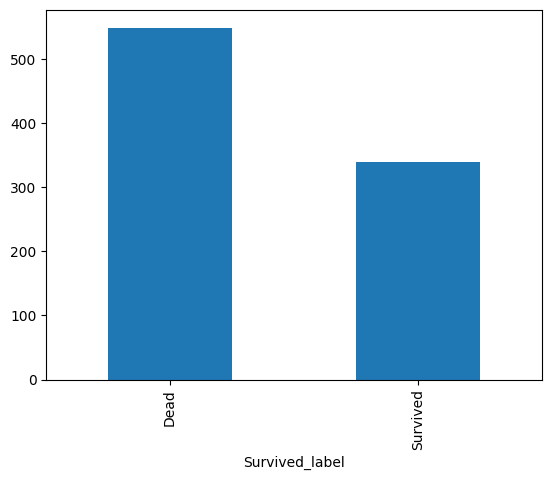

In [23]:
# 생존자 시각화
train['Survived_label'].value_counts().plot(kind='bar', rot='vertical')

<Axes: ylabel='count'>

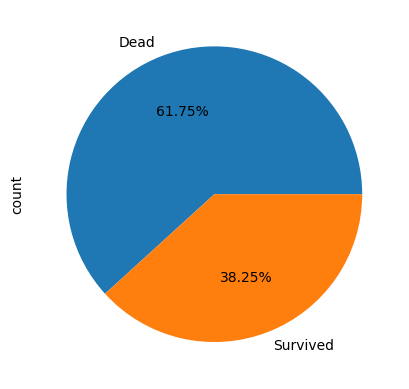

In [25]:
train['Survived_label'].value_counts().plot(kind='pie', autopct='%1.2f%%')

<Axes: ylabel='count'>

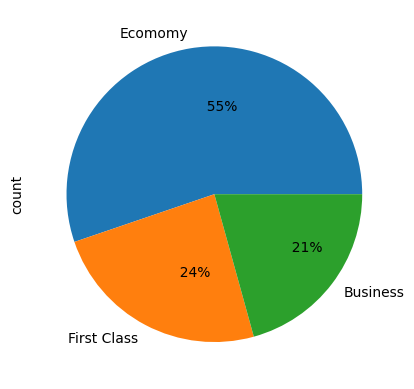

In [27]:
# 등실 시각화
train['Pclass_label']= train['Pclass'].replace(1,'First Class').replace(2,'Business').replace(3,'Ecomomy')
train['Pclass_label'].value_counts().plot(kind='pie', autopct='%12.f%%')

<Axes: xlabel='Pclass_label', ylabel='count'>

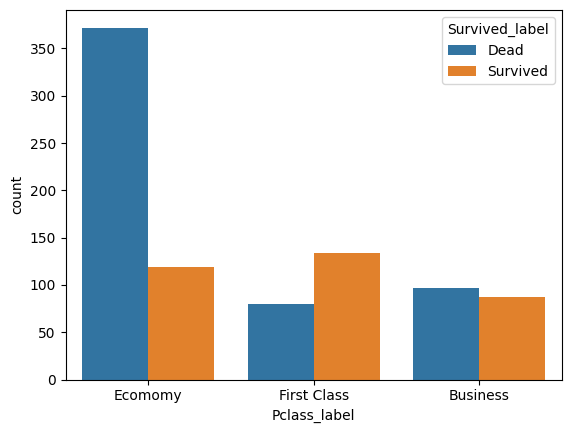

In [29]:
# 객실별 생존여부
sns.countplot(data=train, x="Pclass_label", hue="Survived_label")

<Axes: xlabel='Sex', ylabel='count'>

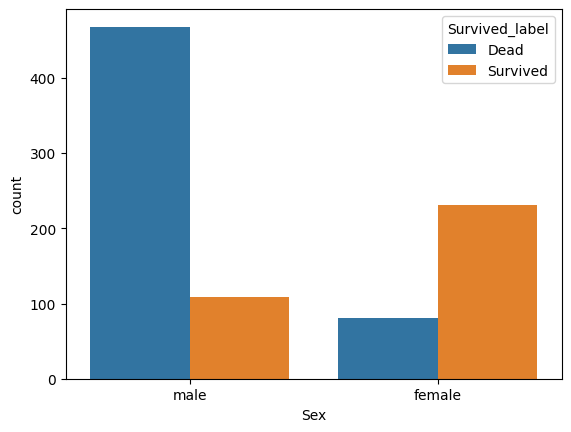

In [31]:
# 성별 생존 여부
sns.countplot(data=train, x='Sex', hue='Survived_label')

In [33]:
# 나이별 생존 여부

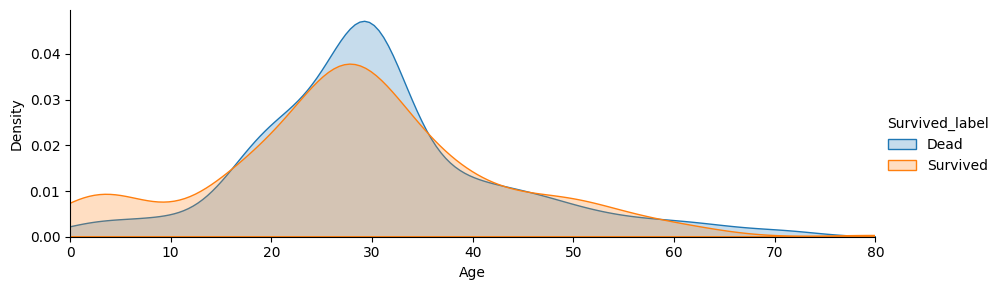

In [43]:
f = sns.FacetGrid(train, hue='Survived_label', aspect=3)
f.map(sns.kdeplot, 'Age', fill=True)
f.set(xlim=(0, train['Age'].max()))
f.add_legend()

<Axes: xlabel='SibSp', ylabel='count'>

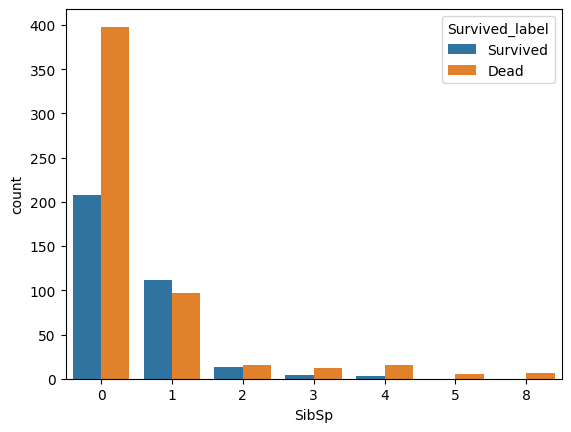

In [59]:
# 형제, 배우자'
sns.countplot(data=train, x='SibSp',hue='Survived_label')

<Axes: xlabel='Parch', ylabel='count'>

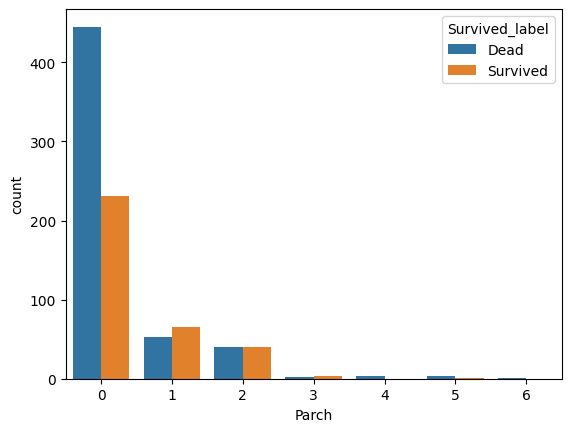

In [61]:
# 부모, 자식
sns.countplot(data=train, x='Parch', hue='Survived_label')

<Axes: xlabel='Single', ylabel='count'>

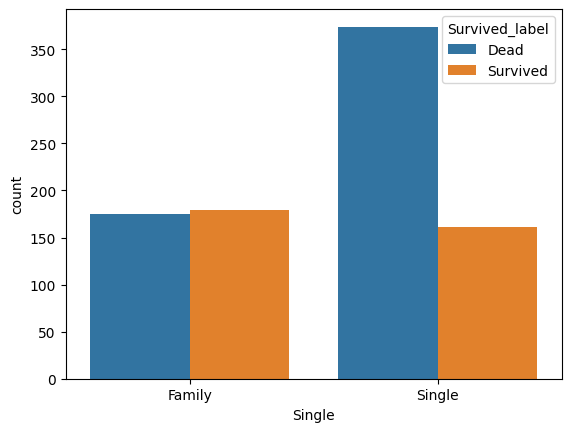

In [71]:
# 가족유무
train.loc[(train['SibSp'] == 0)&(train['Parch']==0),'Single'] = 'Single'
train.loc[(train['SibSp'] !=0) | (train['Parch'] !=0), 'Single']= 'Family'
sns.countplot(data=train, x='Single', hue='Survived_label')